<figcaption style="color: #008080; font-weight: bold; font-size: 18px;">
    <img src="startimage.jpg">
    Emotion Detection Project
</figcaption>

## <font color='#3f51b5'>1.Import Libraries </font> 

In [1]:
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
######
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM,Dense
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

## <font color='#3f51b5'>2.Data Loading For Traning </font> 

In [3]:
file=open('train.txt','r')
x_train=[]
y_train=[]
for line in file: 
    l=line.split(';')
    x_train.append(l[0])
    y_train.append(l[1].strip())
print(x_train[0:10])
print(50*'*')
print(y_train[0:10])


['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy', 'ive been feeling a little burdened lately wasnt sure why that was', 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny', 'i feel as confused about life as a teenager or as jaded as a year old man', 'i have been with petronas for years i feel that petronas has performed well and made a huge profit', 'i feel romantic too']
**************************************************
['sadness', 'sadness', 'anger', 'love', 'anger', 'sadness', 'surprise', 'fear', 'joy', 'love']


## <font color='#3f51b5'>3. Data Loading For Testing </font> 

In [4]:
file=open('test.txt','r')
x_test=[]
y_test=[]
for line in file: 
    l=line.split(';')
    x_test.append(l[0])
    y_test.append(l[1].strip())
print(y_test[0:10])
print(50*'*')
print(x_test[0:10])

['sadness', 'sadness', 'sadness', 'joy', 'sadness', 'fear', 'anger', 'joy', 'joy', 'anger']
**************************************************
['im feeling rather rotten so im not very ambitious right now', 'im updating my blog because i feel shitty', 'i never make her separate from me because i don t ever want her to feel like i m ashamed with her', 'i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived', 'i was feeling a little vain when i did this one', 'i cant walk into a shop anywhere where i do not feel uncomfortable', 'i felt anger when at the end of a telephone call', 'i explain why i clung to a relationship with a boy who was in many ways immature and uncommitted despite the excitement i should have been feeling for getting accepted into the masters program at the university of virginia', 'i like to have the same breathless feeling as a reader eager to see what will happen next', 'i jest i feel grumpy tired and pre me

In [5]:
x_data = x_train + x_test
y_data = y_train + y_test

In [6]:
x_traindata = np.array(x_data)
df = pd.DataFrame(x_traindata)
df.shape

(20000, 1)

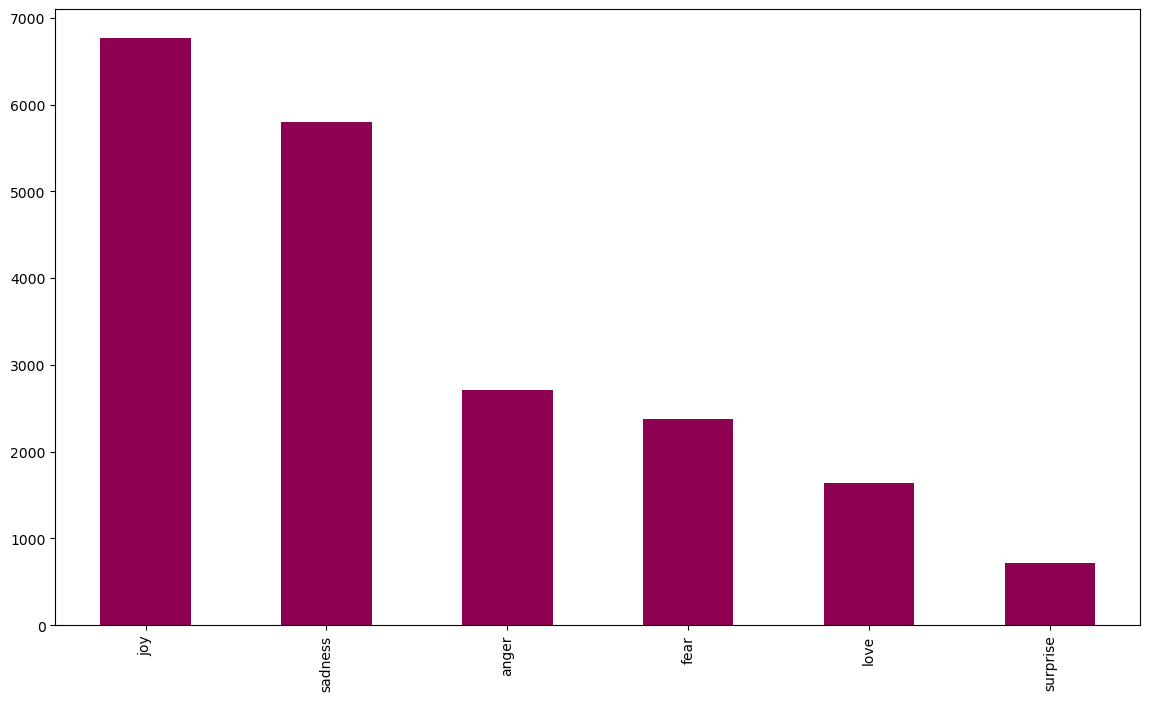

In [7]:
df = pd.DataFrame({'Sentiment': y_data})
# Plot the bar
plt.figure(figsize=(14,8))
df['Sentiment'].value_counts().plot(kind = 'bar',cmap='PiYG')
plt.show()

In [8]:
import imblearn
from collections import Counter
import numpy as np
x_data=np.array(x_data)
from imblearn.over_sampling import RandomOverSampler 
ROS = RandomOverSampler()
print('Original dataset shape %s' % Counter(y_data))
x_data, y_data = ROS.fit_resample(x_data.reshape(-1,1),y_data)
print('After Oversample dataset shape %s' % Counter(y_data))

Original dataset shape Counter({'joy': 6761, 'sadness': 5797, 'anger': 2709, 'fear': 2373, 'love': 1641, 'surprise': 719})
After Oversample dataset shape Counter({'sadness': 6761, 'anger': 6761, 'love': 6761, 'surprise': 6761, 'fear': 6761, 'joy': 6761})


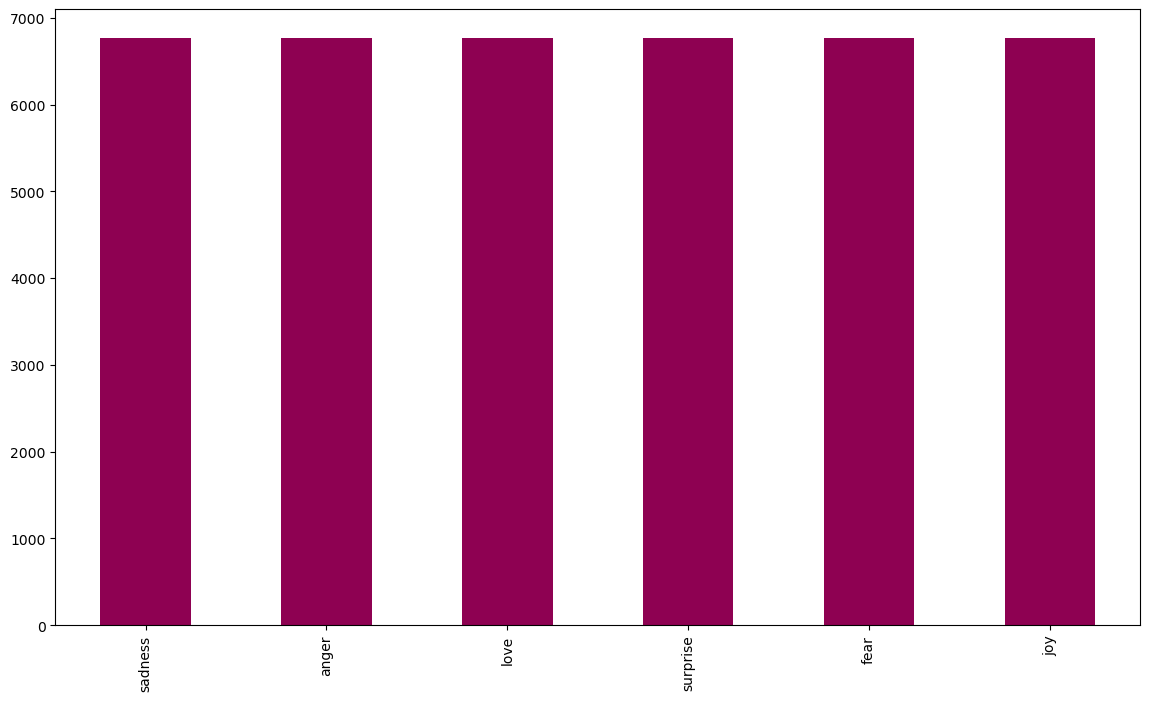

In [9]:
df = pd.DataFrame({'Sentiment': y_data})
# Plot the bar
plt.figure(figsize=(14,8))
df['Sentiment'].value_counts().plot(kind = 'bar',cmap='PiYG')
plt.show()

## <font color='#3f51b5'>4. Preprocessing </font> 

In [10]:
class Preprocessing:
    def __init__(self, data):
        self.txt = data
#*************************************#
    def remove_punctuation(self):
        punc = list(punctuation)
        remove_pun = []
        for sentence in self.txt:
            new_sentence = ''
            for char in sentence:
                if char not in punc:
                    new_sentence += char
            remove_pun.append(new_sentence)
        self.txt = remove_pun
        #print(self.txt)
#*************************************#  
    def Word_Tokenization(self):
        tokenized_sentences = []
        for sentence in self.txt:
            tokens = word_tokenize(sentence)
            tokenized_sentences.append(tokens)
        self.txt = tokenized_sentences
        #print(self.txt)
#*************************************#
    def remove_stop_words(self):
        stop_words = stopwords.words('english')
        filtered_sentences = []
        for sentence in self.txt:
            filtered_words = []
            for word in sentence:
                if word.lower() not in stop_words:
                    filtered_words.append(word.lower())
            filtered_sentences.append(filtered_words)
        self.txt = filtered_sentences
        #print(self.txt)
#*************************************#
    def snowball_stemmer(self):
        ps = SnowballStemmer(language='english')
        snowball_sentences = []
        for sentence in self.txt:
            snowball_words = []
            for word in sentence:
                snowball_words.append(ps.stem(word))
            snowball_sentences.append(snowball_words)
        self.txt = snowball_sentences
        #print(self.txt)
#*************************************#
    def lemmatization(self):
        lemmatizer=WordNetLemmatizer()
        lemma_sentences = []
        for sentence in self.txt:
            lemma_words = []
            for word in sentence:
                lemma_words.append(lemmatizer.lemmatize(word))
            lemma_sentences.append(lemma_words)
        self.txt = lemma_sentences
        #print(self.txt)
#*************************************#
    def portstemmer_sentence(self):
        ps = PorterStemmer()
        portstemmer_sentences = []
        for sentence in self.txt:
            portstemmer_words = []
            for word in sentence:
                portstemmer_words.append(ps.stem(word))
            portstemmer_sentences.append(portstemmer_words)
        self.txt = portstemmer_sentences
        #print(self.txt)
#*************************************#
    def preprocessing_end(self):
        return self.txt
#*************************************#
    def return_data(self):
        new=[]
        for sentences in self.txt:
            sentence = ' '.join(sentences)
            new.append(sentence)
        return new

In [11]:
pre_xtrain=Preprocessing(x_data)#constructor for x_data

## <font color='#3f51b5'>4.1-Remove puntuation </font> 

In [12]:
pre_xtrain.remove_punctuation()

## <font color='#3f51b5'>4.2-Word_Tokenization </font>  

In [13]:
pre_xtrain.Word_Tokenization()

## <font color='#3f51b5'>4.3-Remove_stop_words </font>  

In [14]:
pre_xtrain.remove_stop_words()

## <font color='#3f51b5'>4.4- Porter Stemmer ||Snowball Stemmer || lemmatizer </font>  


In [15]:
#pre_xtrain.snowball_stemmer()
pre_xtrain.lemmatization()
#pre_xtrain.portstemmer_sentence()

## <font color='red'>4.5-Final Result</font>

In [16]:
x_data=pre_xtrain.preprocessing_end()
print(x_data[0:5])

[['didnt', 'feel', 'humiliated'], ['go', 'feeling', 'hopeless', 'damned', 'hopeful', 'around', 'someone', 'care', 'awake'], ['im', 'grabbing', 'minute', 'post', 'feel', 'greedy', 'wrong'], ['ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property'], ['feeling', 'grouchy']]


## <font color='#3f51b5'>5.1-Prepare For Vectorization  </font>  

In [17]:
vector=pre_xtrain.return_data()
print(vector[0:10])

['didnt feel humiliated', 'go feeling hopeless damned hopeful around someone care awake', 'im grabbing minute post feel greedy wrong', 'ever feeling nostalgic fireplace know still property', 'feeling grouchy', 'ive feeling little burdened lately wasnt sure', 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny', 'feel confused life teenager jaded year old man', 'petronas year feel petronas performed well made huge profit', 'feel romantic']


##  <font color='#008080'>5.2-TF-IDF(term frequency-inverse document frequency)</font>  

In [18]:
tfidf_vec = TfidfVectorizer()
tfidf_vec_fit = tfidf_vec.fit(vector)
x_data = tfidf_vec.fit_transform(vector)
print(x_data.toarray().shape)
df = pd.DataFrame(x_data.toarray(),columns=tfidf_vec.get_feature_names_out())
df.head()

(40566, 15081)


,aa,aaaaaaand,aaaaand,aaaah,aaaand,aac,aahhh,aaron,ab,abandon,...,zoned,zonisamide,zoo,zoom,zooming,zq,zucchini,zum,zumba,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##  <font color='#008080'>5.3 Count Vectorization</font>  

In [19]:
cv = CountVectorizer()
corpus = vector
Xcv = cv.fit(corpus)
print(Xcv.vocabulary_)

{'didnt': 3586, 'feel': 4884, 'humiliated': 6380, 'go': 5624, 'feeling': 4888, 'hopeless': 6291, 'damned': 3165, 'hopeful': 6288, 'around': 706, 'someone': 12316, 'care': 1916, 'awake': 931, 'im': 6510, 'grabbing': 5681, 'minute': 8424, 'post': 10095, 'greedy': 5741, 'wrong': 14926, 'ever': 4545, 'nostalgic': 9027, 'fireplace': 5008, 'know': 7395, 'still': 12663, 'property': 10368, 'grouchy': 5781, 'ive': 7024, 'little': 7766, 'burdened': 1757, 'lately': 7504, 'wasnt': 14554, 'sure': 12974, 'taking': 13122, 'milligram': 8388, 'time': 13474, 'recommended': 10771, 'amount': 468, 'fallen': 4785, 'asleep': 770, 'lot': 7873, 'faster': 4829, 'also': 415, 'like': 7697, 'funny': 5389, 'confused': 2657, 'life': 7673, 'teenager': 13231, 'jaded': 7041, 'year': 14979, 'old': 9209, 'man': 8047, 'petronas': 9783, 'performed': 9714, 'well': 14638, 'made': 7981, 'huge': 6358, 'profit': 10326, 'romantic': 11286, 'make': 8022, 'suffering': 12891, 'seeing': 11648, 'mean': 8220, 'something': 12319, 'runni

In [20]:
print(Xcv.get_feature_names_out())

['aa' 'aaaaaaand' 'aaaaand' ... 'zum' 'zumba' 'zz']


In [21]:
# create a document term matrix
Xcv = cv.transform(corpus)
df2 = pd.DataFrame(Xcv.toarray(),columns=cv.get_feature_names_out())
df2.head()

,aa,aaaaaaand,aaaaand,aaaah,aaaand,aac,aahhh,aaron,ab,abandon,...,zoned,zonisamide,zoo,zoom,zooming,zq,zucchini,zum,zumba,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##  <font color='#008080'>5.4 N-Gram Vectorization</font>  

In [45]:
##bigram 
cv = CountVectorizer(ngram_range=(2, 2), max_features=10000)
corpus2 = vector
X = cv.fit_transform(corpus2)
print(X.shape)
print(X.toarray())
df3 = pd.DataFrame(X.toarray(),columns=cv.get_feature_names_out())
df3

(40566, 10000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


,ability empathize,ability quickly,ability thing,ability understand,able actually,able feel,able find,able get,able help,able let,...,youre going,youre naomi,youre shocked,youtube id,youtube next,youve made,yuuki doesnt,zach way,zealand yesterday,zhuo feng
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
for i in range(5) : 
    print(sorted(list(df.iloc[i,:]),reverse=True)[:20])
    print('--------------------------------------------------')

[0.8074754972502243, 0.5685851606857835, 0.15714399889408687, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
--------------------------------------------------
[0.4873321074958138, 0.4280969158054225, 0.37978730809564487, 0.3642245379770015, 0.31213002817197594, 0.26460143475614856, 0.25473461088611116, 0.24157005971657303, 0.10797057344507892, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
--------------------------------------------------
[0.5682469391990586, 0.41095064317020397, 0.40824416923635193, 0.4024636209314783, 0.369211275940883, 0.18827628964050389, 0.08837301373978092, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
--------------------------------------------------
[0.5620394136273237, 0.5443216683027975, 0.3700567471399171, 0.3312360724126764, 0.2574012721137588, 0.24244444171616036, 0.12701009790374562, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
-----------------------------------------

## <font color='#3f51b5'>Encoding </font> 

In [23]:
encoding={'anger':0,'sadness':1,'fear':2,'joy':3,'surprise':4,'love':5}
y_data=[encoding[x] for x in y_data]

In [24]:
print(y_data[:10])

[1, 1, 0, 5, 0, 1, 4, 2, 3, 5]


## <font color='#3f51b5'>Split Data => x_train , x_test </font> 

In [25]:
from sklearn.model_selection import train_test_split

data_tfidf_train, data_tfidf_test, label_train, label_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
data_tfidf_train.shape
#data_tfidf_test.shape

(32452, 15081)

## <font color='#3f51b5'>MultinomialNB </font> 

In [38]:
spam_detect_model1 = MultinomialNB().fit(data_tfidf_train, label_train)
pred_test_MNB = spam_detect_model1.predict(data_tfidf_test)
precision = precision_score(label_test, pred_test_MNB, average='weighted')
recall = recall_score(label_test, pred_test_MNB, average='weighted')
accuracy = accuracy_score(label_test, pred_test_MNB)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(accuracy, 3)))
print(confusion_matrix(label_test,pred_test_MNB))
print (classification_report(label_test, pred_test_MNB))

Precision: 0.92 / Recall: 0.919 / Accuracy: 0.919
[[1296   28   35   13   15   11]
 [  42 1202   41   19   27   19]
 [  19   19 1199    9   57    7]
 [  22   32   27 1101   47  109]
 [   0    2   12    5 1346    0]
 [   2    8    3   24    2 1314]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1398
           1       0.93      0.89      0.91      1350
           2       0.91      0.92      0.91      1310
           3       0.94      0.82      0.88      1338
           4       0.90      0.99      0.94      1365
           5       0.90      0.97      0.93      1353

    accuracy                           0.92      8114
   macro avg       0.92      0.92      0.92      8114
weighted avg       0.92      0.92      0.92      8114



## <font color='#3f51b5'>Decision_Tree_Classifier </font> 

In [39]:
spam_detect_model2 = tree.DecisionTreeClassifier().fit(data_tfidf_train, label_train)
pred_test_MNB = spam_detect_model2.predict(data_tfidf_test)
precision = precision_score(label_test, pred_test_MNB,average='weighted')
recall = recall_score(label_test, pred_test_MNB,average='weighted')
accuracy = accuracy_score(label_test, pred_test_MNB)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(accuracy, 3)))
print(confusion_matrix(label_test,pred_test_MNB))
print (classification_report(label_test, pred_test_MNB))

Precision: 0.956 / Recall: 0.955 / Accuracy: 0.955
[[1367    5   13    9    1    3]
 [  37 1237   31   28    5   12]
 [   8    3 1280    1   16    2]
 [  13   46   16 1154   25   84]
 [   0    0    0    0 1365    0]
 [   0    0    0    4    2 1347]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1398
           1       0.96      0.92      0.94      1350
           2       0.96      0.98      0.97      1310
           3       0.96      0.86      0.91      1338
           4       0.97      1.00      0.98      1365
           5       0.93      1.00      0.96      1353

    accuracy                           0.96      8114
   macro avg       0.96      0.95      0.95      8114
weighted avg       0.96      0.96      0.95      8114



## <font color='#3f51b5'>Random_Forest_Classifier </font> 

In [40]:
spam_detect_model3 = RandomForestClassifier().fit(data_tfidf_train, label_train)
pred_test_MNB = spam_detect_model3.predict(data_tfidf_test)
precision = precision_score(label_test, pred_test_MNB,average='weighted')
recall = recall_score(label_test, pred_test_MNB,average='weighted')
accuracy = accuracy_score(label_test, pred_test_MNB)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(accuracy, 3)))
print(confusion_matrix(label_test,pred_test_MNB))
print (classification_report(label_test, pred_test_MNB))

Precision: 0.963 / Recall: 0.962 / Accuracy: 0.962
[[1371    7    8    8    1    3]
 [  32 1254   21   24    5   14]
 [  11    5 1274    0   18    2]
 [   8   20   13 1198   20   79]
 [   0    0    0    0 1365    0]
 [   0    0    0    8    0 1345]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1398
           1       0.98      0.93      0.95      1350
           2       0.97      0.97      0.97      1310
           3       0.97      0.90      0.93      1338
           4       0.97      1.00      0.98      1365
           5       0.93      0.99      0.96      1353

    accuracy                           0.96      8114
   macro avg       0.96      0.96      0.96      8114
weighted avg       0.96      0.96      0.96      8114



## <font color='#3f51b5'>LogisticRegression </font> 

In [41]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(data_tfidf_train, label_train)

# Use the trained model to make predictions on the test data
pred_test_lr = lr_model.predict(data_tfidf_test)

# Evaluate the performance of the model using precision, recall, and accuracy
precision = precision_score(label_test, pred_test_lr, average='weighted')
recall = recall_score(label_test, pred_test_lr, average='weighted')
accuracy = accuracy_score(label_test, pred_test_lr)

# Print the evaluation metrics
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(accuracy, 3)))
print(confusion_matrix(label_test, pred_test_lr))
print(classification_report(label_test, pred_test_lr))

Precision: 0.952 / Recall: 0.952 / Accuracy: 0.952
[[1332   23   23   13    3    4]
 [  34 1255   26   21    5    9]
 [  22    6 1231   12   35    4]
 [   5   21   11 1216   21   64]
 [   0    0    3    0 1362    0]
 [   0    3    0   20    0 1330]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1398
           1       0.96      0.93      0.94      1350
           2       0.95      0.94      0.95      1310
           3       0.95      0.91      0.93      1338
           4       0.96      1.00      0.98      1365
           5       0.94      0.98      0.96      1353

    accuracy                           0.95      8114
   macro avg       0.95      0.95      0.95      8114
weighted avg       0.95      0.95      0.95      8114



## <font color='#3f51b5'>SVC </font> 

In [42]:
from sklearn.svm import SVC

# Train an SVM model on the training data
svm_model = SVC(random_state=42)
svm_model.fit(data_tfidf_train, label_train)

# Use the trained model to make predictions on the test data
pred_test_svm = svm_model.predict(data_tfidf_test)

# Evaluate the performance of the model using precision, recall, and accuracy
precision = precision_score(label_test, pred_test_svm, average='weighted')
recall = recall_score(label_test, pred_test_svm, average='weighted')
accuracy = accuracy_score(label_test, pred_test_svm)

# Print the evaluation metrics
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(accuracy, 3)))
print(confusion_matrix(label_test, pred_test_svm))
print(classification_report(label_test, pred_test_svm))

Precision: 0.969 / Recall: 0.969 / Accuracy: 0.969
[[1351   21    7   18    0    1]
 [  23 1276   13   29    4    5]
 [   7    1 1278   11   11    2]
 [   5   20    7 1253    7   46]
 [   0    3    0    0 1362    0]
 [   0    0    0   12    0 1341]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1398
           1       0.97      0.95      0.96      1350
           2       0.98      0.98      0.98      1310
           3       0.95      0.94      0.94      1338
           4       0.98      1.00      0.99      1365
           5       0.96      0.99      0.98      1353

    accuracy                           0.97      8114
   macro avg       0.97      0.97      0.97      8114
weighted avg       0.97      0.97      0.97      8114



## <font color='#3f51b5'>KNeighborsClassifier </font> 

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN model on the training data
knn_model = KNeighborsClassifier()
knn_model.fit(data_tfidf_train, label_train)

# Use the trained model to make predictions on the test data
pred_test_knn = knn_model.predict(data_tfidf_test)

# Evaluate the performance of the model using precision, recall, and accuracy
precision = precision_score(label_test, pred_test_knn, average='weighted')
recall = recall_score(label_test, pred_test_knn, average='weighted')
accuracy = accuracy_score(label_test, pred_test_knn)

# Print the evaluation metrics
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(accuracy, 3)))
print(confusion_matrix(label_test, pred_test_knn))
print(classification_report(label_test, pred_test_knn))

Precision: 0.85 / Recall: 0.848 / Accuracy: 0.848
[[1196   51   50   22   36   43]
 [  74 1080   75   34   41   46]
 [  58   47 1112   16   45   32]
 [  73   61   97  934   57  116]
 [   3    3    4    0 1354    1]
 [  28   27   42   33   18 1205]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1398
           1       0.85      0.80      0.82      1350
           2       0.81      0.85      0.83      1310
           3       0.90      0.70      0.79      1338
           4       0.87      0.99      0.93      1365
           5       0.84      0.89      0.86      1353

    accuracy                           0.85      8114
   macro avg       0.85      0.85      0.85      8114
weighted avg       0.85      0.85      0.85      8114



## <font color='#3f51b5'>xgboost </font> 

In [44]:
from xgboost import XGBClassifier
# Train an XGBClassifier model on the training data
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(data_tfidf_train, label_train)

# Use the trained model to make predictions on the test data
pred_test_xgb = xgb_model.predict(data_tfidf_test)

# Evaluate the performance of the model using precision, recall, and accuracy
precision = precision_score(label_test, pred_test_xgb, average='weighted')
recall = recall_score(label_test, pred_test_xgb, average='weighted')
accuracy = accuracy_score(label_test, pred_test_xgb)

# Print the evaluation metrics
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(accuracy, 3)))
print(confusion_matrix(label_test, pred_test_xgb))
print(classification_report(label_test, pred_test_xgb))

Precision: 0.943 / Recall: 0.942 / Accuracy: 0.942
[[1311   10   18   51    4    4]
 [  37 1225   30   40    7   11]
 [  15    7 1207   18   61    2]
 [   5   18   11 1193   27   84]
 [   0    0    2    0 1363    0]
 [   0    0    0    6    2 1345]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1398
           1       0.97      0.91      0.94      1350
           2       0.95      0.92      0.94      1310
           3       0.91      0.89      0.90      1338
           4       0.93      1.00      0.96      1365
           5       0.93      0.99      0.96      1353

    accuracy                           0.94      8114
   macro avg       0.94      0.94      0.94      8114
weighted avg       0.94      0.94      0.94      8114



## <font color='#3f51b5'>RNN </font> 

In [26]:
import numpy as np

num_features = data_tfidf_train.shape[1]
num_timesteps = 1  # Each sample consists of a single timestep

# Reshape training data into 3D tensor
X_train = np.reshape(data_tfidf_train.toarray(), (data_tfidf_train.shape[0], num_timesteps, num_features))

# Reshape testing data into 3D tensor
X_test = np.reshape(data_tfidf_test.toarray(), (data_tfidf_test.shape[0], num_timesteps, num_features))
label_train = np.array(label_train).tolist()
label_test = np.array(label_test).tolist()

In [27]:
from keras.utils import to_categorical

# Define RNN model
model = Sequential()
model.add(LSTM(64, input_shape=(num_timesteps, num_features)))
model.add(Dense(6, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Prepare target labels without one-hot encoding
label_train = np.array(label_train)
label_test = np.array(label_test)

# Train RNN model
Model = model.fit(X_train, label_train,  epochs=5, batch_size=32)#validation_data=(X_test, label_test),
score = model.evaluate(X_test, label_test, batch_size=32)
print('RNN Accuracy:', score[1])

Epoch 1/5
1015/1015 [==============================] - 51s 48ms/step - loss: 0.7837 - accuracy: 0.8460
Epoch 2/5
1015/1015 [==============================] - 47s 47ms/step - loss: 0.1002 - accuracy: 0.9737
Epoch 3/5
1015/1015 [==============================] - 46s 46ms/step - loss: 0.0477 - accuracy: 0.9888
Epoch 4/5
1015/1015 [==============================] - 46s 45ms/step - loss: 0.0310 - accuracy: 0.9922
Epoch 5/5
254/254 [==============================] - 3s 5ms/step - loss: 0.1272 - accuracy: 0.9618
RNN Accuracy: 0.9617944359779358


In [28]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

254/254 [==============================] - 1s 4ms/step


In [31]:
y_pred_labels[:10]

array([4, 0, 4, 4, 4, 1, 4, 1, 2, 4], dtype=int64)

In [37]:
# Convert true labels to categorical
label_test_cat = to_categorical(label_test)

# Make predictions on test data
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the classification report and confusion matrix
print(classification_report(label_test, y_pred_labels))
print(confusion_matrix(label_test, y_pred_labels))

254/254 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1398
           1       0.94      0.93      0.94      1350
           2       0.97      0.96      0.97      1310
           3       0.95      0.91      0.93      1338
           4       0.98      1.00      0.99      1365
           5       0.95      0.99      0.97      1353

    accuracy                           0.96      8114
   macro avg       0.96      0.96      0.96      8114
weighted avg       0.96      0.96      0.96      8114

[[1358   21    7    7    0    5]
 [  31 1262   18   29    1    9]
 [   3   15 1263   16   12    1]
 [   6   36   12 1221    9   54]
 [   0    0    0    0 1365    0]
 [   0    2    0   16    0 1335]]


## <font color='red'>Compare Results To Choose Best Model </font> 

<AxesSubplot:xlabel='Algorithm', ylabel='Accuracy Score'>

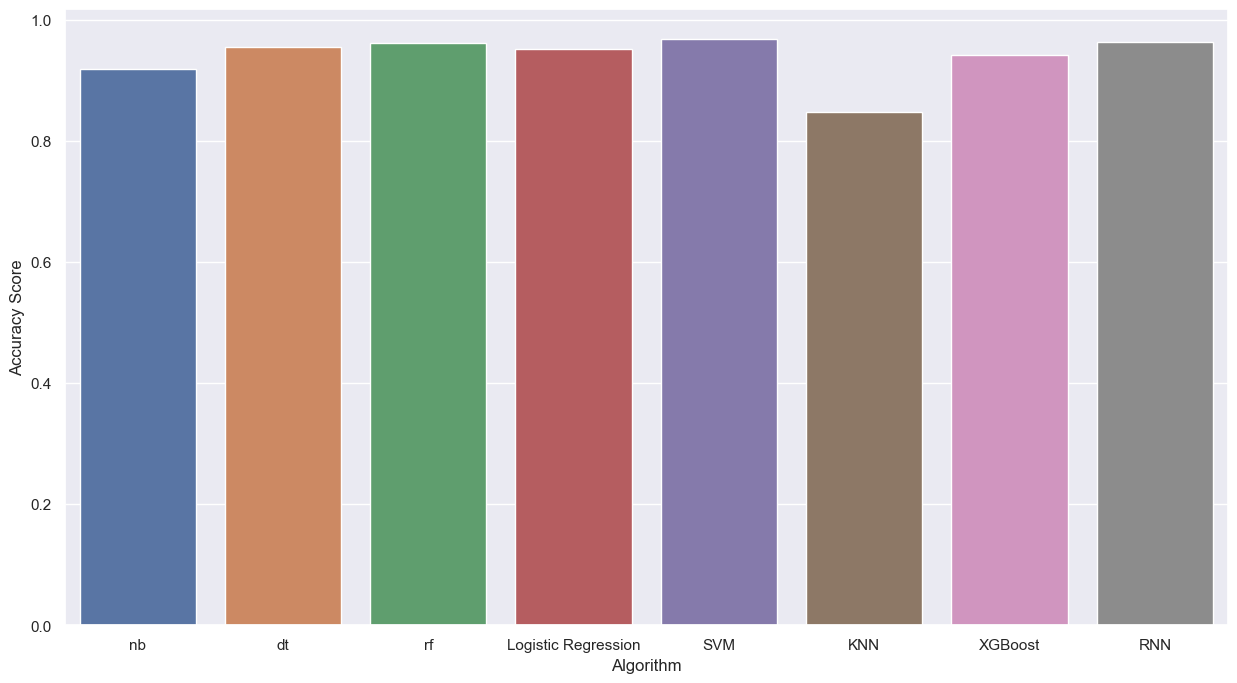

In [48]:
svm_score = svm_model.score(data_tfidf_test, label_test)
knn_score = knn_model.score(data_tfidf_test, label_test)
xgb_score = xgb_model.score(data_tfidf_test, label_test)
lr_score = lr_model.score(data_tfidf_test, label_test)
nb_score = spam_detect_model1.score(data_tfidf_test, label_test)
dt_score = spam_detect_model2.score(data_tfidf_test, label_test)
rf_score = spam_detect_model3.score(data_tfidf_test, label_test)

# Create a dataframe with the algorithm names and their scores
algorithms = ['nb','dt','rf','Logistic Regression', 'SVM', 'KNN', 'XGBoost', 'RNN']
scores = [nb_score, dt_score, rf_score, lr_score, svm_score, knn_score, xgb_score, score[1]]
df = pd.DataFrame({'Algorithm': algorithms, 'Accuracy Score': scores})

# Set the figure size and labels
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")

# Create the barplot
sns.barplot(x='Algorithm', y='Accuracy Score', data=df)

## <font color='#3f51b5'>Make Predictions </font> 

In [38]:
encoding={'anger':0,'sadness':1,'fear':2,'joy':3,'surprise':4,'love':5}
def return_label(pred):
    for key , value in encoding.items():
        if(value== pred):
            return key

In [50]:
text = 'hossam feel dissatisfied'
X = tfidf_vec.transform([text])
pred = lr_model.predict(X)
print(return_label(pred[0]))

anger


In [51]:
text = 'i feel disappointed'
X = tfidf_vec.transform([text])
pred = lr_model.predict(X)
print(return_label(pred[0]))

sadness


In [52]:
text = ' I feel terrified '
X = tfidf_vec.transform([text])
pred = lr_model.predict(X)
print(return_label(pred[0]))

fear


In [53]:
text = 'I love playing'
X = tfidf_vec.transform([text])
pred = lr_model.predict(X)
print(return_label(pred[0]))

joy


In [54]:
text = 'i m shocked my son pass the exam'
X = tfidf_vec.transform([text])
pred = lr_model.predict(X)
print(return_label(pred[0]))

surprise


In [55]:
text = 'hossam love AlAhly SC '
X = tfidf_vec.transform([text])
pred = lr_model.predict(X)
print(return_label(pred[0]))

love


## <font color='#3f51b5'>Save The Model </font> 

In [48]:
# saave vectorizer
#with open('vectorizer.pkl', 'wb') as f:
#    pickle.dump(tfidf_vec, f)
#Save the trained model
#with open('lr_model.pkl', 'wb') as f:
#    pickle.dump(lr_model, f)

#with open('rnn_model.pkl', 'wb') as f:
#   pickle.dump(Model, f)

## <font color='#3f51b5'>Model Deployment </font> 

In [3]:
import pickle
# Load the saved model and make a prediction
with open('vectorizer.pkl', 'rb') as f:
    tfidf_vec = pickle.load(f)
with open('lr_model.pkl', 'rb') as f:
    saved_model = pickle.load(f)

# Use the saved model to make a prediction
text =input("Enter Your Sentiment: ")
text_vectorized = tfidf_vec.transform([text])
pred = saved_model.predict(text_vectorized)[0]
print(return_label(pred))

Enter Your Sentiment: i love you 
love


## API

In [2]:
from flask import Flask, request, jsonify
import pickle
encoding={'anger':0,'sadness':1,'fear':2,'joy':3,'surprise':4,'love':5}
def return_label(pred):
    for key , value in encoding.items():
        if(value== pred):
            return key

In [4]:


app = Flask(__name__)

@app.route('/classify', methods=['POST'])
def classify_sentence():
    text = request.form.get('sentence')
    # TODO: Add code to classify the sentence
    text_vectorized = tfidf_vec.transform([text])
    pred = saved_model.predict(text_vectorized)[0]
    classification_result = return_label(pred)
    response = {'classification': classification_result}
    return jsonify(response)


In [ ]:
app.run(port=9000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:9000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/May/2023 12:45:29] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2023 12:46:13] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2023 12:48:01] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2023 12:49:18] "POST /classify HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2023 12:51:12] "POST /classify HTTP/1.1" 200 -
